# Part A

**Descriptive Analysis of the additives**

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [4]:
# import the data
data = pd.read_csv('ingredient.csv')

In [5]:
# Descriptive analysis
data.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [5]:
# Number of Numerical Variables
num_var = [var for var in data.columns if data[var].dtypes != '0']
print(f"Number of Numerical Variables : {len(num_var)}")

Number of Numerical Variables : 9


In [18]:
# Standard Deviation and Variance of each variables
def calculate_stdev_variance(variable):
    print(f"{round(variable.std(), 2)}\t\t\t{round(variable.var(), 2)}")
for var in num_var:
    if variable == num_var[0]:
        print(f"Standard Deviation\tVariance")
    calculate_stdev_variance(data[var])

Standard Deviation	Variance
0.0			0.0
Standard Deviation	Variance
0.82			0.67
Standard Deviation	Variance
1.44			2.08
Standard Deviation	Variance
0.5			0.25
Standard Deviation	Variance
0.77			0.6
Standard Deviation	Variance
0.65			0.43
Standard Deviation	Variance
1.42			2.03
Standard Deviation	Variance
0.5			0.25
Standard Deviation	Variance
0.1			0.01


**Summary**

Column c and g has higher standard deviation and variance.\
Column a and i has low standard deviation and variance.

**Correlation Analysis**

In [19]:
df = pd.DataFrame(data)

In [20]:
corr_matrix = df.corr()
print(corr_matrix)

          a         b         c         d         e         f         g  \
a  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
b -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
c -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
d -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
e -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
f -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
g  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
h -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
i  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   

          h         i  
a -0.000386  0.143010  
b  0.326603 -0.241346  
c -0.492262  0.083060  
d  0.479404 -0.074402  
e -0.102151 -0.094201  
f -0.042618 -0.007719  
g -0.112841  0.124968  
h  1.000000 -0.058692  
i -0.058692  1.000000  


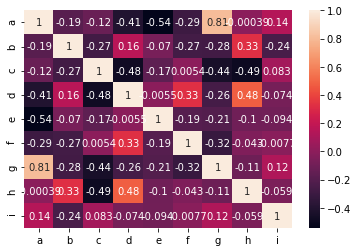

In [21]:
sns.heatmap(corr_matrix, annot = True)
plot.show()

**Summary**

The correlation analysis shows that:
1. Column a and g has high positive correlation
2. Column a and e has high negative correlation
3. Column c and h has high negative correlation
4. Column c and d has high negative correlation

# Part B

**Plotting histogram for each variables**

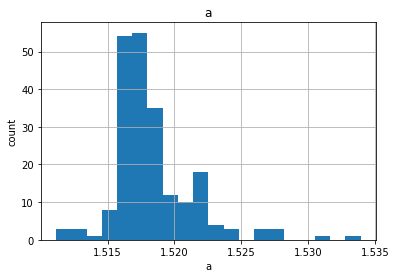

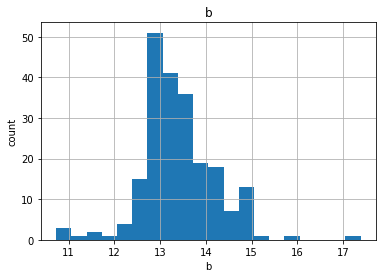

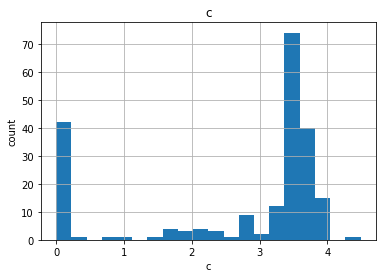

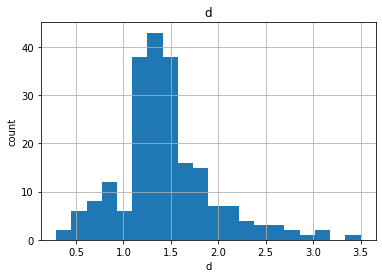

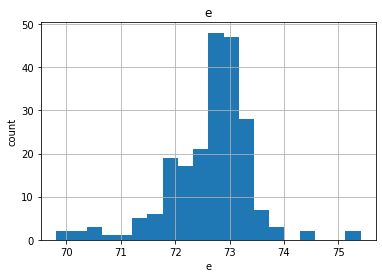

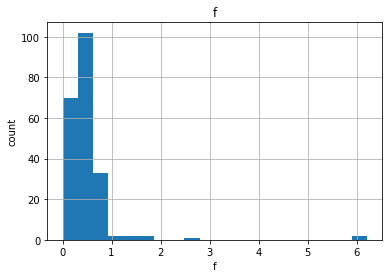

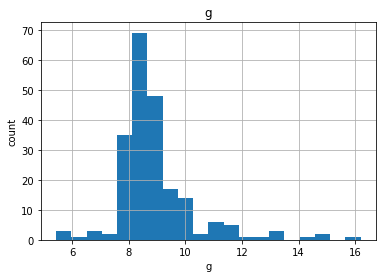

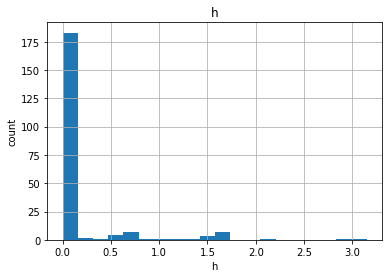

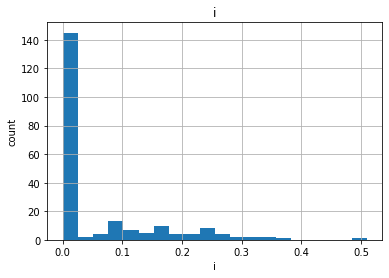

In [25]:
def plotting_histogram(data, var):
    data[var].hist(bins=20)
    plot.xlabel(var)
    plot.ylabel('count')
    plot.title(var)
    plot.show()
for var in num_var:
    plotting_histogram(data, var)

**Summary**

The histograms show that:
1. Column a, b, d, f, and g is right-skewed
2. Column e is left-skewed

# Part C

**Doing K-mean clustering**

In [6]:
from sklearn.cluster import KMeans
X = data.copy()

# Calculation within-cluster sum of squared
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=100, n_init=10, random_state = 0)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

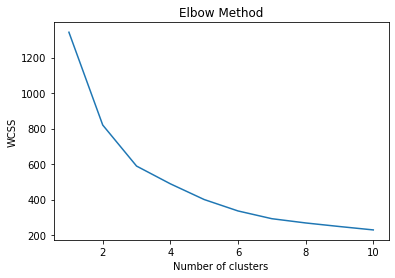

In [8]:
# Plotting WCSS
plot.plot(range(1, 11), wcss)
plot.title('Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
plot.show()

**Summary**

Based on the Elbow method, it suggests that we will have 3 clusters.